# Assignment Sheet 7
## Done by Nayan Man Singh Pradhan

### Impoting libraries

In [8]:
## Importing
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import cm
import matplotlib.pyplot as plt

### Functions

In [9]:
## L2 Loss function

def L2_loss(pred, actual):
    temp = (pred-actual)
    return np.dot(temp.T, temp)

#------------------------------------------------------------------------------------------#

## Error estimation by validation set approach

def err_validation_set(x, y, k_for_KNN_reg):
    
    ## Splitting data into train and validate sets
    split_size = random.randint(1, len(x)-1)
    train_x = x[0:split_size]
    train_y = y[0:split_size]
    validate_x = x[split_size:]
    validate_y = y[split_size:]
    
    ## Reshaping into np array
    train_x = np.array(train_x)
    validate_x = np.array(validate_x)
    train_x = train_x.reshape(-1,1)
    validate_x = validate_x.reshape(-1,1)
    
    ## Using KNN regressor to predict for single k
    clf = KNeighborsRegressor(n_neighbors = k_for_KNN_reg)
    clf.fit(train_x, train_y)
    prediction = (clf.predict(validate_x))
    Err = (1/len(validate_x)) * sum(L2_loss(prediction, validate_y))

    return Err[0]

#------------------------------------------------------------------------------------------#

## Error estimation by k fold cross validation

def k_fold_cross_validation(x, y, k_folds, k_for_KNN_reg):
    inp = list(zip(x, y))
    folds = np.array_split(inp, k_folds)
    
    Err = []
    
    for i in range(0, len(folds)):
        x_Train = []
        y_Train = []
        x_Validate = []
        y_Validate = []
        Validate = []
        
        Validate.append(folds[i])
        Train = [z for j, z in enumerate(folds) if j!=i]
        
        for train_datas in Train:
            for train_data in train_datas:
                x_Train.append(train_data[0])
                y_Train.append(train_data[1])
                
        for validate_datas in Validate:
            for validate_data in validate_datas:
                x_Validate.append(validate_data[0])
                y_Validate.append(validate_data[1])

        x_Train = np.asarray(x_Train)
        y_Train = np.asarray(y_Train)
        x_Validate = np.asarray(x_Validate)
        y_Validate = np.asarray(y_Validate)

        x_Train = x_Train.reshape(-1, 1)
        y_Train = y_Train.reshape(-1, 1)        
        x_Validate = x_Validate.reshape(-1, 1)
        y_Validate = y_Validate.reshape(-1, 1)
        
        clf = KNeighborsRegressor(n_neighbors = k_for_KNN_reg)
        clf.fit(x_Train, y_Train)
        prediction = (clf.predict(x_Validate))
        Err.append((1/len(x_Validate)) * sum(L2_loss(prediction, y_Validate)))
    
    Avg_Err = (1/k_folds) * sum(sum(Err))
    
    return (Avg_Err)

#------------------------------------------------------------------------------------------#
    
## Error estimation by validation set approach for graphing

def err_validation_set_graph(train_x, train_y, validate_x, validate_y, k_for_KNN_reg):
    
    ## Using KNN regressor to predict for single k
    clf = KNeighborsRegressor(n_neighbors = k_for_KNN_reg)
    clf.fit(train_x, train_y)
    prediction = (clf.predict(validate_x))
    Err = (1/len(validate_x)) * sum(L2_loss(prediction, validate_y))

    return Err

#------------------------------------------------------------------------------------------#

### Results

In [10]:
## Results

## Generate random input sample
N = 51
x = []
y = []

for i in range(0, N):
    mu, sigma = 0, 1.15 ## mean and standard deviation
    noise = np.random.normal(mu, sigma, 1)
    
    temp_x = random.randint(-4,4)
    temp_y = temp_x**2 + noise
    
    x.append(temp_x)
    y.append(temp_y)
    
k_for_knn_reg = 3

## Error in validation set for K_neighbors = 3
err_val_set_result = err_validation_set(x, y, k_for_knn_reg)

k_folds = 10
## Error in k-fold validtiaon set for K_neighbors = 3 and K_folds = 10
k_fold_result = k_fold_cross_validation(x, y, k_folds, k_for_knn_reg)

print("From Error Validation Set:", err_val_set_result)
print("From K-fold Validation Set:", k_fold_result)

From Error Validation Set: 9.813389885887696
From K-fold Validation Set: 2.9451177763135683


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 45, n_neighbors = 47

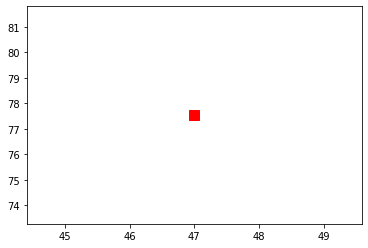

In [13]:
## For graphing like example 6.3

## Generate random input sample
N = 51
x = []
y = []
for i in range(0, N):
    mu, sigma = 0, 1.15 ## mean and standard deviation
    noise = np.random.normal(mu, sigma, 1)
    
    temp_x = random.randint(-4,4)
    temp_y = temp_x**2 + noise
    
    x.append(temp_x)
    y.append(temp_y)
    
## Splitting data into train and validate sets
split_size = random.randint(1, len(x)-1)
train_x = x[0:split_size]
train_y = y[0:split_size]
validate_x = x[split_size:]
validate_y = y[split_size:]
    
## Reshaping into np array
train_x = np.array(train_x)
validate_x = np.array(validate_x)
train_x = train_x.reshape(-1,1)
validate_x = validate_x.reshape(-1,1)
    
## Error Validation Set     
for k in range(len(train_x), 0, -1):
    result_validation_set_graph = err_validation_set_graph(train_x, train_y, validate_x, validate_y, k)
    plt.plot(k, result_validation_set_graph, color = 'c', label="knn regressor")
    plt.plot(k, result_validation_set_graph, 'rs', markersize=10, color = 'r')
    
    result_k_fold_set_graph = k_fold_cross_validation(x, y, 10, k)
    plt.plot(k, result_k_fold_set_graph, color = 'c', label="knn regressor")
    plt.plot(k, result_k_fold_set_graph, 'rs', markersize=10, color = 'b')
    
    plt.title("neighborhood size k vs generalization error")
    plt.xlabel("neighborhood size k")
    plt.ylabel("generalization error")
plt.show()

print("We notice that the generalization error is the minimum when the neighborhood size is small, and is large when the neighboorhood size is large.")